In [131]:
# PCA on Israeli Election and Socio-Economic Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from urllib.request import urlopen
import io

# Optional: Hebrew font support if needed
plt.rcParams['font.family'] = 'Arial'

### 1. Load the datasets

election_df = pd.read_csv('expc.csv', encoding='utf-8')
socio_df = pd.read_csv('socio.csv', encoding='utf-8')

socio_df = socio_df.drop(index=0)
# Standardize the column name in one of the DataFrames
socio_df.rename(columns={'סמל יישוב': 'סמל ישוב'}, inplace=True)
socio_df.rename(columns={' אשכול 2021[4]':'אשכול' }, inplace=True)


election_df['סמל ישוב'] = election_df['סמל ישוב'].astype(str)
socio_df['סמל ישוב'] = socio_df['סמל ישוב'].astype(str)


# Merge datasets by locality (you might need to inspect and align column names manually)
# Example keys: 'Locality Code', 'Locality Name'
idx_ = 'סמל ישוב'
merged_df = pd.merge(election_df, socio_df, on=idx_, how='inner')
merged_df['סמל ועדה'] = merged_df['סמל ועדה'].astype(str)



In [132]:
merged_df

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,אצ,ב,...,שס,ת,שם יישוב,NAME OF LOCALITY,צורת יישוב,אוכלוסיית המדד 2021[1],ערך מדד 2021[2],דירוג 2021[3],אשכול,אשכול 2019[4]
0,18,אבו קרינאת יישוב,1342,703,351,5,346,2,0,0,...,0,0,אבו קורינאת (יישוב),Abu Qureinat,290,"2,078",-2.024,16,1,1
1,18,אבו תלול,1375,1141,653,6,647,0,0,0,...,0,0,אבו תלול,Abu Tulul,290,"2,327",-3.012,4,1,1
2,8,אבטין,652,1935,875,8,867,1,0,0,...,3,0,אבטין,Ibtin,290,"2,894",-1.363,33,2,2
3,20,אבטליון,1275,323,244,0,244,32,2,5,...,0,0,אבטליון,Avtalyon,370,475,1.112,716,8,8
4,9,אביאל,679,547,405,3,402,36,0,2,...,2,0,אביאל,Avi'el,310,820,1.159,735,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,18,תפרח,709,1082,953,9,944,1,4,0,...,180,0,תפרח,Tifrah,191,"2,231",-2.222,11,1,1
975,18,תקומה,665,514,415,1,414,3,2,42,...,13,0,תקומה,Tequma,310,737,1.315,803,8,8
976,2,תקוע,3563,2334,1686,11,1675,25,18,266,...,27,0,תקוע,Teqoa,190,"4,312",0.130,252,6,5
977,18,תראבין אצאנעישוב,1346,650,248,5,243,1,0,0,...,1,0,תרבין א-צאנע (יישוב),Tarabin As-Sani,450,"1,234",-3.506,1,1,1


In [133]:
### 2. Preprocessing
# Select only numerical columns (excluding codes/names)
numeric_cols = merged_df.select_dtypes(include=np.number).columns
X = merged_df[numeric_cols].dropna()
X

,בזב,מצביעים,פסולים,כשרים,אמת,אצ,ב,ג,ד,ום,...,צ,ץ,ק,קי,קך,קנ,קץ,רז,שס,ת
0,703,351,5,346,2,0,0,1,6,9,...,1,0,0,0,0,1,0,0,0,0
1,1141,653,6,647,0,0,0,0,6,136,...,0,0,0,0,0,0,0,0,0,0
2,1935,875,8,867,1,0,0,0,74,195,...,0,0,0,0,1,0,1,0,3,0
3,323,244,0,244,32,2,5,0,0,5,...,0,0,0,0,0,0,7,0,0,0
4,547,405,3,402,36,0,2,2,1,3,...,0,0,0,0,0,0,15,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1082,953,9,944,1,4,0,670,0,0,...,0,0,0,0,0,0,0,0,180,0
975,514,415,1,414,3,2,42,1,0,0,...,0,0,0,0,0,0,1,0,13,0
976,2334,1686,11,1675,25,18,266,13,0,1,...,1,1,1,3,0,0,26,0,27,0
977,650,248,5,243,1,0,0,0,6,1,...,0,0,0,0,0,0,1,0,1,0


In [153]:
# Scaling (localities' voting propotions)
X_scaled = X.div(X.sum(axis=1),axis=0)
X_scaled = X_scaled.drop(X_scaled.columns[[2, 3]], axis=1)

X_scaled

,בזב,מצביעים,אמת,אצ,ב,ג,ד,ום,ז,זך,...,צ,ץ,ק,קי,קך,קנ,קץ,רז,שס,ת
0,0.401485,0.200457,0.001142,0.000000,0.000000,0.000571,0.003427,0.005140,0.0,0.000000,...,0.000571,0.000000,0.000000,0.000000,0.00000,0.000571,0.000000,0.0,0.000000,0.0
1,0.368778,0.211054,0.000000,0.000000,0.000000,0.000000,0.001939,0.043956,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0
2,0.425088,0.192223,0.000220,0.000000,0.000000,0.000000,0.016257,0.042838,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00022,0.000000,0.000220,0.0,0.000659,0.0
3,0.306161,0.231280,0.030332,0.001896,0.004739,0.000000,0.000000,0.004739,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.006635,0.0,0.000000,0.0
4,0.310972,0.230244,0.020466,0.000000,0.001137,0.001137,0.000569,0.001706,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008528,0.0,0.001137,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.275178,0.242370,0.000254,0.001017,0.000000,0.170397,0.000000,0.000000,0.0,0.000254,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.045778,0.0
975,0.292378,0.236064,0.001706,0.001138,0.023891,0.000569,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000569,0.0,0.007395,0.0
976,0.316217,0.228424,0.003387,0.002439,0.036038,0.001761,0.000000,0.000135,0.0,0.000000,...,0.000135,0.000135,0.000135,0.000406,0.00000,0.000000,0.003523,0.0,0.003658,0.0
977,0.467963,0.178546,0.000720,0.000000,0.000000,0.000000,0.004320,0.000720,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000720,0.0,0.000720,0.0


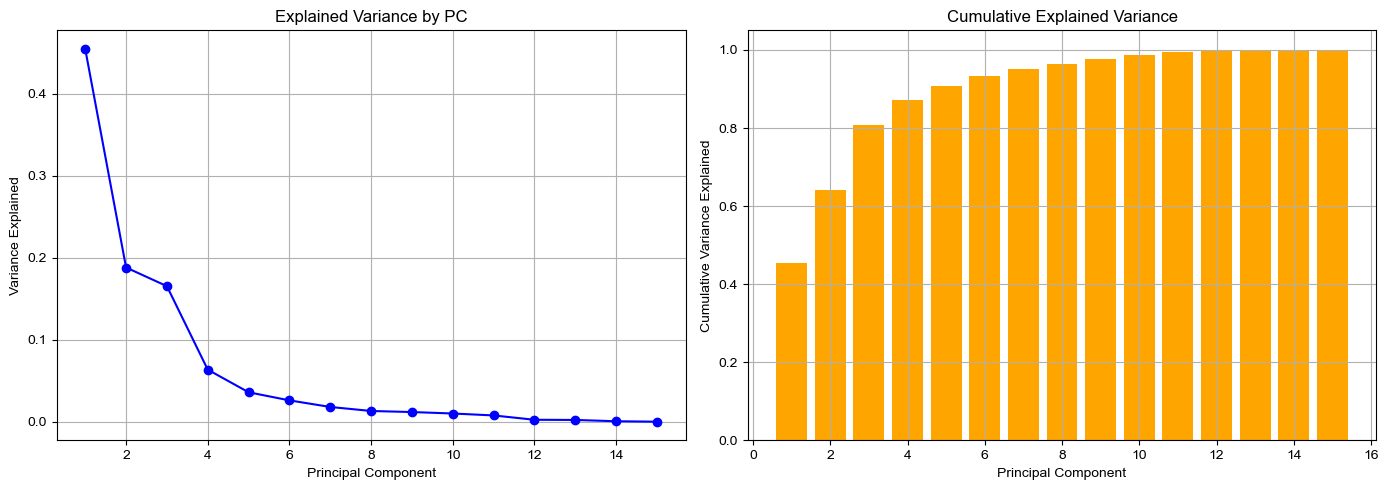

In [154]:

### 3. PCA via sklearn
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Add PCs to dataframe
for i in range(X_pca.shape[1]):
    merged_df[f'PC{i+1}'] = X_pca[:, i]

### 4. Visualizations: Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

C = 15
# Individual explained variance (line plot)
axes[0].plot(range(1, C + 1), explained_variance[:C], marker='o', color='blue')
axes[0].set_title('Explained Variance by PC')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].grid(True)

# Cumulative explained variance (bar plot)
axes[1].bar(range(1, C + 1), cumulative_variance[:C], color='orange')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_ylim(0, 1.05)
axes[1].grid(True)

plt.tight_layout()
plt.show()


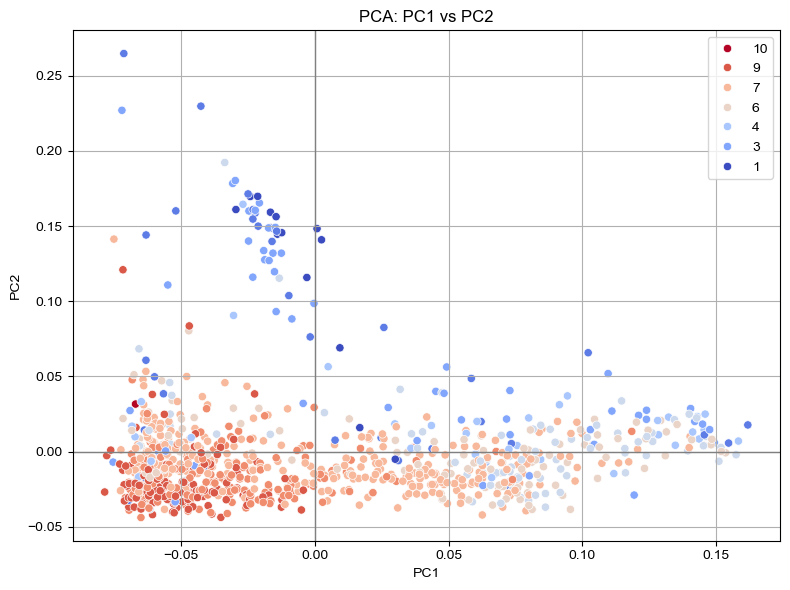

In [155]:

# Plot of first two PCs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=merged_df, hue='אשכול', palette='coolwarm')
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
# Reverse the legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

plt.tight_layout()
plt.show()



In [156]:
eshkol_df = merged_df
eshkol_df['אשכול'] = eshkol_df['אשכול'].astype(int)


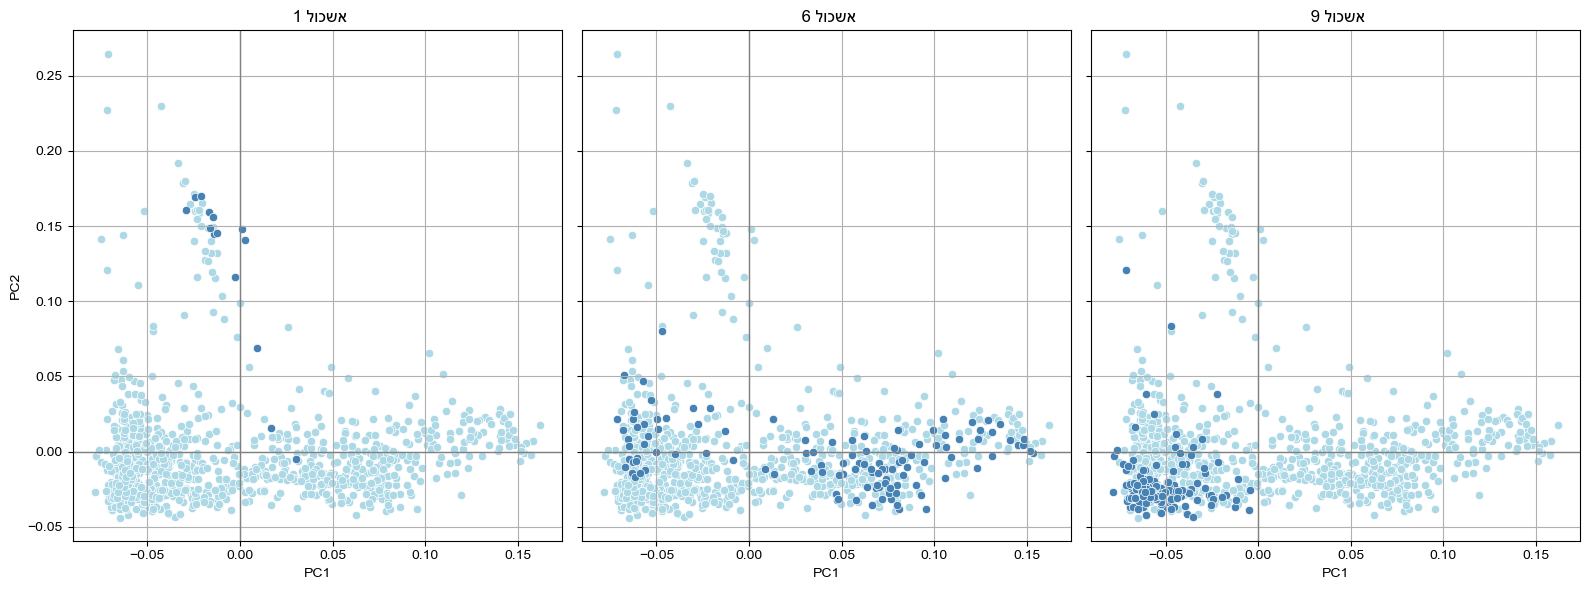

In [157]:

# Values of interest - Eshkol
selected_clusters = [1,6,9]

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)


# Plot 2-4: Individual clusters
for i, cluster in enumerate(selected_clusters):
    df_subset = merged_df[merged_df['אשכול'] != cluster]
    sns.scatterplot(
        x='PC1', y='PC2',
        data=df_subset,
        color='lightblue',
        ax=axes[i],
        legend=False
    )

    df_subset = merged_df[merged_df['אשכול'] == cluster]
    sns.scatterplot(
        x='PC1', y='PC2',
        data=df_subset,
        color='steelblue',
        ax=axes[i],
        legend=False
    )
 
    axes[i].set_title(f" {str(cluster)}" + "אשכול "[::-1] )  # Reverse for RTL feel
    axes[i].axhline(0, color='grey', lw=1)
    axes[i].axvline(0, color='grey', lw=1)
    axes[i].grid(True)

# Label axes for all
for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()


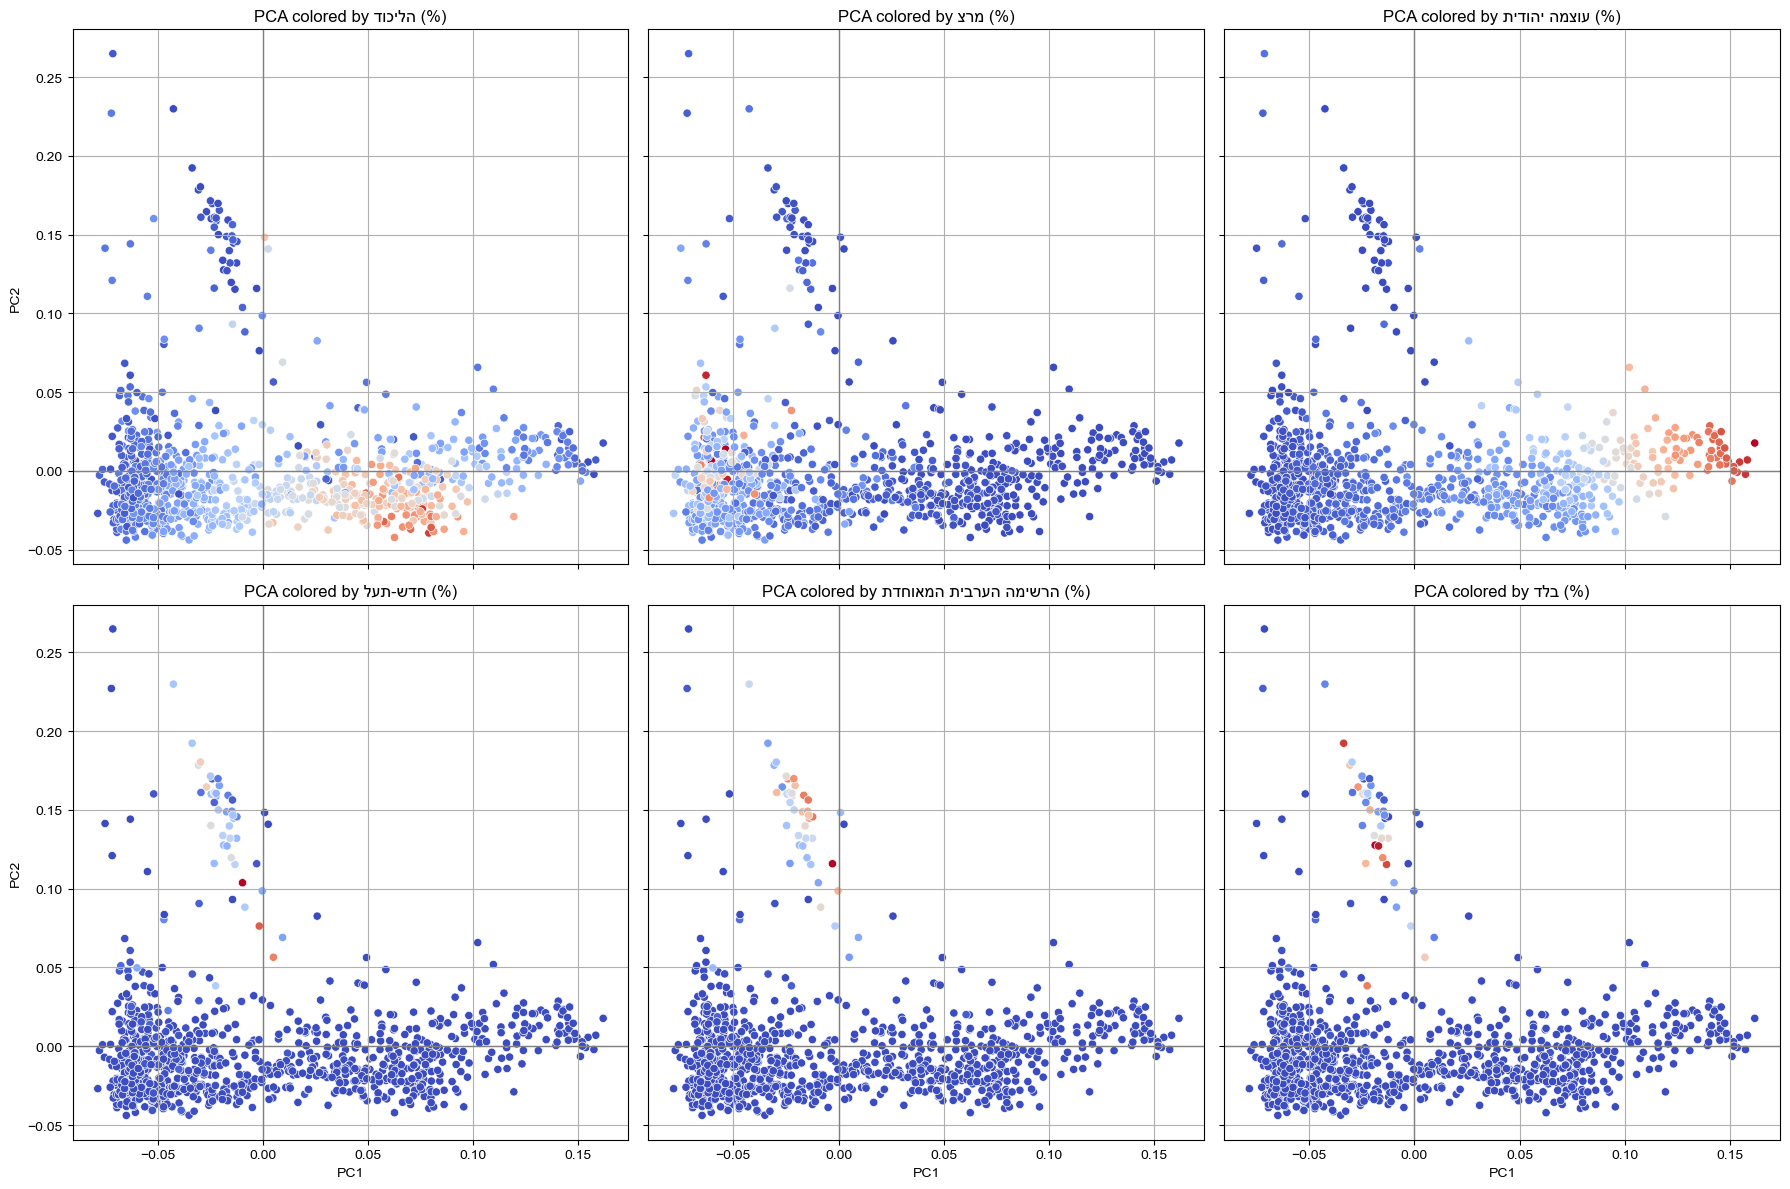

In [158]:

# Parties of interest 
parties = ['מחל', 'מרצ','ט','ום','עם', 'ד'] 
names = ['הליכוד', 'מרצ','עוצמה יהודית','חדש-תעל','הרשימה הערבית המאוחדת', 'בלד']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(6 * 3,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):

    sns.scatterplot(
        x='PC1', y='PC2',
        data=merged_df,
        hue=X_scaled[parties[i]],  # Normalize by row sum
        palette='coolwarm',
        ax=ax,
        legend=False
    )
    ax.set_title(f'PCA colored by {names[i][::-1]} (%)')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.grid(True)

plt.tight_layout()
plt.show()



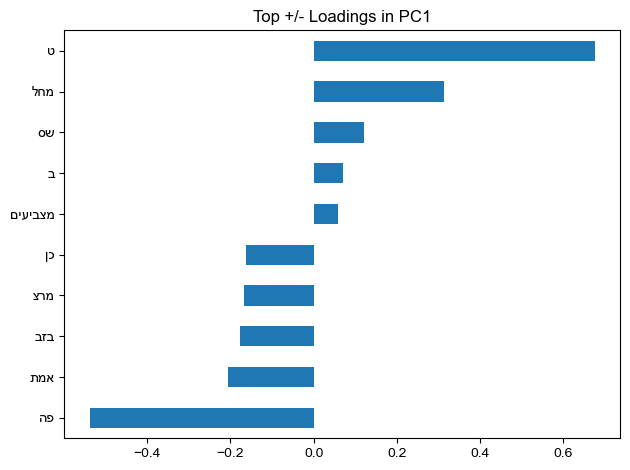

In [164]:
# Loadings plot (PC1)
loadings = pd.Series(pca.components_[0], index=X_scaled.columns)  # V_1 entries

top_pos = loadings.nlargest(5)
top_neg = loadings.nsmallest(5)
top = pd.concat([top_neg, top_pos])
top.sort_values().plot(kind='barh', title='Top +/- Loadings in PC1')

# Reverse the y-tick labels text
ax = plt.gca()
labels = ax.get_yticklabels()
reversed_labels = [label.get_text()[::-1] for label in labels]
ax.set_yticklabels(reversed_labels)


plt.tight_layout()
plt.show()



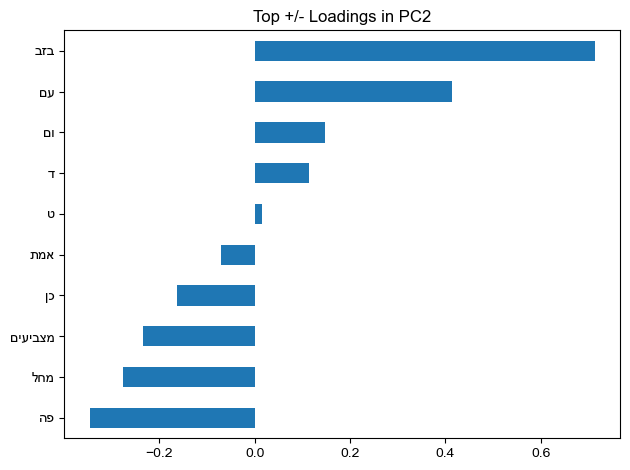

In [163]:
# Loadings plot (PC2)
loadings = pd.Series(pca.components_[1], index=X_scaled.columns) # V_2 entries

top_pos = loadings.nlargest(5)
top_neg = loadings.nsmallest(5)
top = pd.concat([top_neg, top_pos])
top.sort_values().plot(kind='barh', title='Top +/- Loadings in PC2')


# Reverse the y-tick labels text
ax = plt.gca()
labels = ax.get_yticklabels()
reversed_labels = [label.get_text()[::-1] for label in labels]
ax.set_yticklabels(reversed_labels)

plt.tight_layout()
plt.show()
